In [14]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt

### Definindo os exemplos

In [15]:
# Exemplos (atributos).
# 7 exemplos para a classe negativa.
# 13 exemplos para a classe positiva.
# Total: 20 exemplos.
X = np.array([
    # classe 0
    [0.3, 1.8],[0.5, 2.5],[0.1, 3],[0.75, 3.5],[1, 2.8],[1.5, 3.25],[2.3, 3.7],
    # classe 1
    [0.5, 0.5],[0.75, 1.2],[1, 0.5],[1.2, 1.3],[1.7, 0.9],[2, 1],[1.7, 2],[2.8, 0.5],[2.7, 1.7],[2.2, 2.5],[2.9, 3.1],[3.2, 3.5],[3.3, 2.7],
])

# Classes a que os exemplos pertencem (rótulos).
# Rótulo com valor 0: representa a classe negativa.
# Rótulo com valor 1: representa a classe positiva.
y = np.array([0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1])

# Dimensões de X e y.
print('Dimensões de X:', X.shape)
print('Dimensão de y:', y.shape)

Dimensões de X: (20, 2)
Dimensão de y: (20,)


### Mostrando os exemplos de cada classe

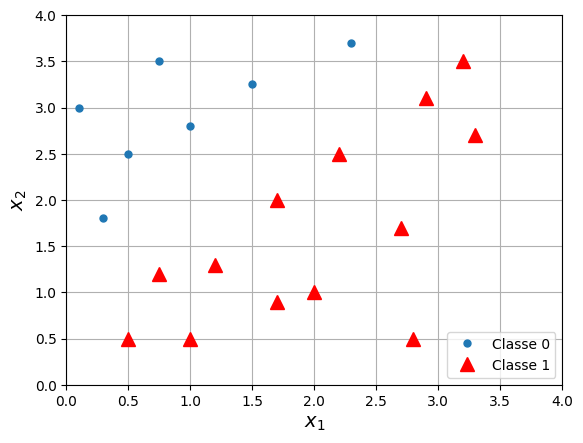

In [16]:
axis1 = np.argwhere(y==0)
axis2 = np.argwhere(y==1)

plt.plot(X[axis1,0], X[axis1,1], '.', markersize=10, label='Classe 0')
plt.plot(X[axis2,0], X[axis2,1], 'r^', markersize=10, label='Classe 1')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.grid()
plt.xlim([0, 4])
plt.ylim([0, 4])
plt.legend()
plt.show()

### Classificando

Definição da função que será usada para classificar os exemplos criados anteriormente.
</br>

Usaremos a função discriminante que encontramos anteriormente.
</br>

**Observações**:

+ Percebam que estamos seguindo o **paradigma da programação tradicional**, onde fornecemos à máquina as entradas e o programa que contém as regras que mapeiam as entradas nas saídas.
</br>
+ O objetivo da primeira parte deste curso será usarmos algortimos de ML que treinem um modelo que mapeie as entradas nas classes corretas.

In [17]:
def predict(X):
    # Obtém número de exemplos.
    N = X.shape[0]
    # Vetor para armazenar as classes preditas.
    y_pred = np.zeros((N,))
    for i in range(0, N):
        # Acesse os valores de cada um dos 2 atributos.
        x1 = X[i, 0]
        x2 = X[i, 1]

        # Função discriminante.
        g = 1 + x1 - x2

        # Eu escolhi arbitrariamente atribuir g == 0 à classe 0, mas poderia ser à classe 1.
        if(g <= 0):
            y_pred[i] = 0
        else: # g > 0
            y_pred[i] = 1

    return y_pred

In [18]:
# Realizando a classificação (predição).
y_pred = predict(X)

### Calculando o erro

O objetivo de grande parte dos algoritmos de treinamento ML é sempre **minimizar alguma espécie de erro**.
</br>

Aqui contabilizamos como erro a quantidade de classificações incorretas.
</br>

Uma outra medida muito usada com classificadores é a acurácia, que contabiliza a quantidade de classificações corretas.
</br>

A acurácia é o complemento do erro de classificação.

In [19]:
error = 0
for i in range(0, len(y)):
    if(y_pred[i] != y[i]):
        error += 1

# Erro e acurácia estão em porcentagem.
print('Erro da predição:', error/len(y))
print('Acurácia da predição:', 1 - (error/len(y)))

Erro da predição: 0.0
Acurácia da predição: 1.0


### Mostrando as regiões de decisão

Usamos a função `meshgrid` para criar pares de pontos dentro de um intervalo e com isso plotar as regiões de decisão.

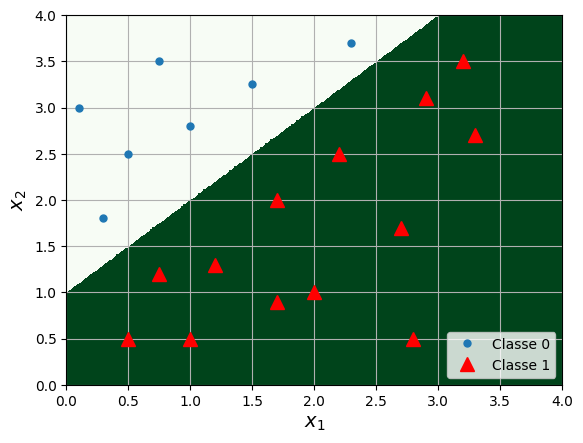

In [20]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = 0, 4
y_min, y_max = 0, 4
h = .01  # step size in the mesh
# O meshgrid cria uma combinação de pontos (valores) entre os intervalos definidos para plotar as regiões de decisão.
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Uso a função de predição para obter a classe de cada combinação de pontos gerada pelo meshgrid.
Z = predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Greens, shading='auto')
# Plot also the training points
plt.plot(X[axis1,0], X[axis1,1], '.', markersize=10, label='Classe 0')
plt.plot(X[axis2,0], X[axis2,1], 'r^', markersize=10, label='Classe 1')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)

plt.xlim(0, 4)
plt.ylim(0, 4)
plt.legend()
plt.grid()

plt.show()